<a href="https://colab.research.google.com/github/DenisseCardona/Tareas_EstadisticaAplicada_24/blob/main/EDCP_1888872_EstadisticaAplicadaG51_parcial1parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ERIKA DENISSE CARDONA PADILLA 1888872

ESTADISTICA APLICADA - GRUPO 51

PRIMER PARCIAL 



# Modelo ETS

## Error Trend Seasonality

## Irregular Tendencia Estacionalidad

Statsmodels proporciona una herramienta de descomposición estacional que podemos usar para separar los diferentes componentes de una serie de tiempo.

Aplicamos un modelo aditivo cuando parece que la tendencia es más lineal y los componentes de estacionalidad y tendencia parecen ser constantes en el tiempo.

Un modelo multiplicativo es más apropiado cuando estamos aumentando (o disminuyendo) a una tasa no lineal.

Para estos ejemplos, usaremos los datos de Pasajeros de líneas aéreas internacionales, que brinda totales mensuales en miles desde enero de 1949 hasta diciembre de 1960.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
imx = pd.read_csv('https://raw.githubusercontent.com/DenisseCardona/Tareas_EstadisticaAplicada_24/main/inflacionmx.csv?token=GHSAT0AAAAAABSHL5VNX4NCBPZT5B3RIMZEYRFRICA',index_col='Perido mensual',parse_dates=True)

In [ ]:
imx.dropna(inplace=True)

In [ ]:
imx.head()

,Inflacion México INPC
Perido mensual,
2010-01-01,4.46
2010-02-01,4.83
2010-03-01,4.97
2010-04-01,4.27
2010-05-01,3.92


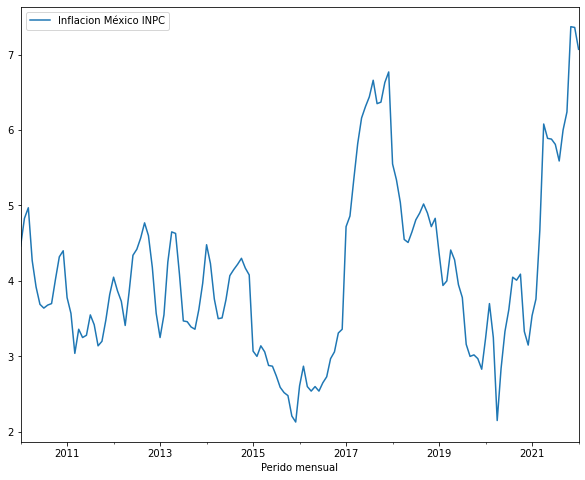

In [ ]:
imx.plot(figsize=(10,8));

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


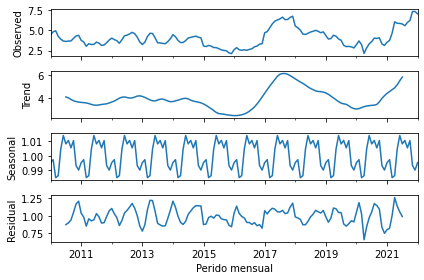

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(imx['Inflacion México INPC'], model='multiplicative')  #mul tambien funciona
result.plot();


In [ ]:
#vamos a obtner la serie desestacionalida
#primero obtenemos el componente estacional al que accedemos con .seasonal del objeto result
componente_estacional = result.seasonal
imx['desestacionalizado'] = imx['Inflacion México INPC'] / componente_estacional

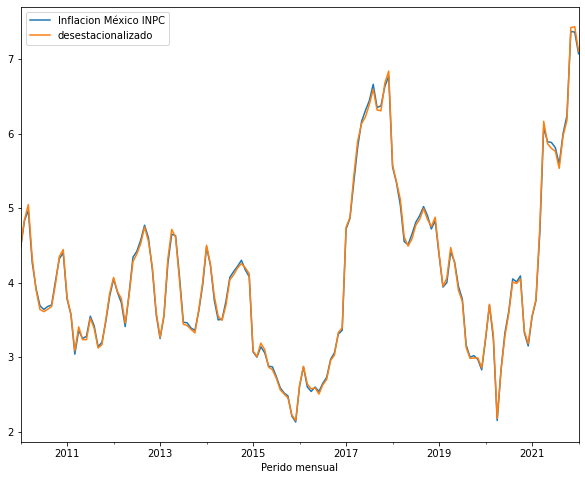

In [ ]:
#graficamos
imx[['Inflacion México INPC','desestacionalizado']].plot(figsize=(10,8));

# Promedio Móvil Simple SMA 
## Simple moving average

In [ ]:
imx['PMS-6meses'] = imx['Inflacion México INPC'].rolling(window=6).mean()
imx['PMS-12meses'] = imx['Inflacion México INPC'].rolling(window=12).mean()

In [ ]:
imx.head(15)

,Inflacion México INPC,desestacionalizado,PMS-6meses,PMS-12meses
Perido mensual,,,,
2010-01-01,4.46,4.481388,NaN,NaN
2010-02-01,4.83,4.843154,NaN,NaN
2010-03-01,4.97,5.045852,NaN,NaN
2010-04-01,4.27,4.329083,NaN,NaN
2010-05-01,3.92,3.902285,NaN,NaN
2010-06-01,3.69,3.639581,4.356667,NaN
2010-07-01,3.64,3.610734,4.220000,NaN
2010-08-01,3.68,3.641907,4.028333,NaN
2010-09-01,3.70,3.680146,3.816667,NaN


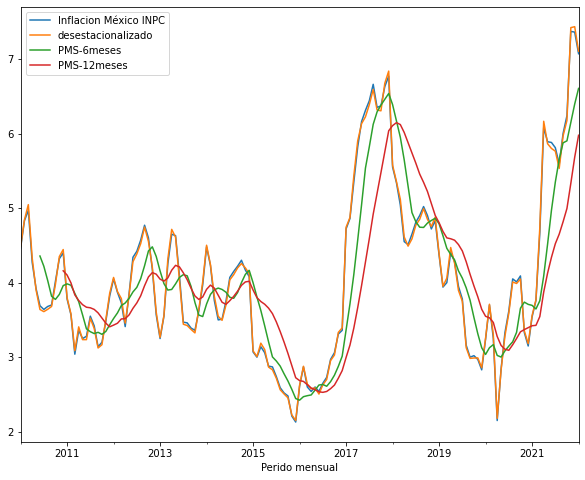

In [ ]:
imx.plot(figsize=(10,8));

# Promedio Móvil Ponderado Exponencialmente EWMA
## Exponentially Weighted Moving Average

Acabamos de mostrar cómo calcular el PMS para un periodo de tiempo T. Sin embargo, el PMS básico tiene algunas debilidades:
* Periodos de tiempo muy pequeños generarán más ruido, en lugar de  brindarnos una señal de la tendencia de la serie
* Siempre tendra un ajuste hacia atrás 
* Nunca alcanzará el pico o valle completo de los datos debido al promedio.
* Realmente no informa sobre el posible comportamiento futuro de la serie, todo lo que hace es describir la tendencia pasada de los datos.
* Los valores históricos extremos pueden sesgar el PMS

Una alternativa que soluciona o minimiza los problemas anteriores es el EWMA

En python  cuando damos adjust true
### $y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^t}$

cuando damos adjust False
### $\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

para aplicar EWMA usamos la función EWM

In [ ]:
imx['EWMA12'] = imx['Inflacion México INPC'].ewm(span=12,adjust=False).mean()

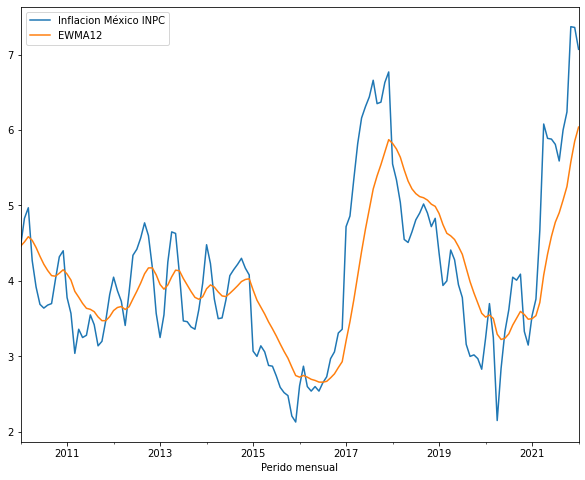

In [ ]:
imx[['Inflacion México INPC','EWMA12']].plot(figsize=(10,8));

## Comparemos PMS to EWMA

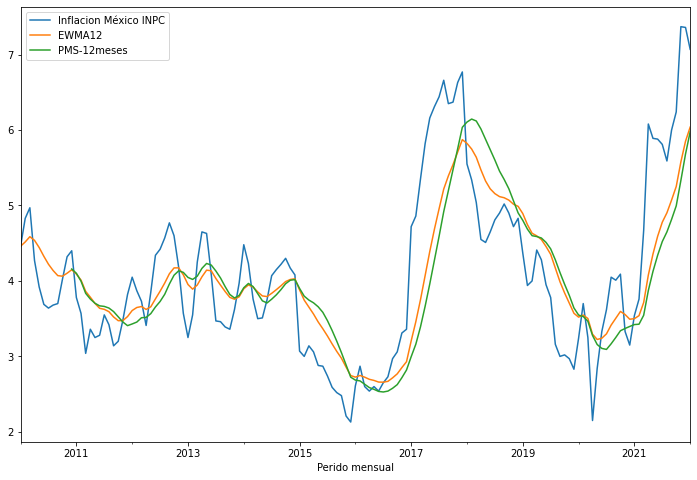

In [ ]:
imx[['Inflacion México INPC','EWMA12','PMS-12meses']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

# Métodos Holt-Winters 

En esta sección, veremos el suavizado exponencial doble y triple con los métodos de Holt-Winters.

En el suavizado exponencial doble (también conocido como método de Holt) presentamos un nuevo factor de suavizado 𝛽 (beta) que aborda la tendencia:
\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    nivel}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    tendencia}\\
y_t &= l_t + b_t & \text{   modelo estimado}\\
\hat y_{t+h} &= l_t + hb_t & \text{    modelo de pronóstico (} h = \text{# periodos futuros)}\end{split}

Debido a que aún no hemos considerado las fluctuaciones estacionales, el modelo de pronóstico es simplemente una línea recta que se extiende desde el punto de datos más reciente.

Con el suavizado exponencial triple (también conocido como el método Holt-Winters) introducimos un factor de suavizado 𝛾 (gamma) que aborda la estacionalidad:
\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    nivel}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    tendencia}\\
c_t &= (1-\gamma)c_{t-L} + \gamma(x_t-l_{t-1}-b_{t-1}) & \text{    estacionalidad}\\
y_t &= (l_t + b_t) c_t & \text{    modelo estimado}\\
\hat y_{t+m} &= (l_t + mb_t)c_{t-L+1+(m-1)modL} & \text{    modelo de pronóstico (} m = \text{# periodos futuros)}\end{split}
$L$ representa el número de frecuencia de la serie por periodo. En nuestro caso tenemos datos mensuales, por tanto debemos usar $L=12$.

En general, valores muy grandes de $\alpha$, $\beta$ y $\gamma$, dan mas peso a las observaciones presentes.

Antes de ejecutar el método de holt winters tenemos que establecer la frecuencia de los datos

In [ ]:
imx.index

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01',
               ...
               '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
               '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01',
               '2021-12-01', '2022-01-01'],
              dtype='datetime64[ns]', name='Perido mensual', length=145, freq=None)

note que en **freq** no esta especificado

In [ ]:
imx.index.freq = 'MS'
imx.index

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01',
               ...
               '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
               '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01',
               '2021-12-01', '2022-01-01'],
              dtype='datetime64[ns]', name='Perido mensual', length=145, freq='MS')

## Promedio exponencial simple

La función statmodels Holt-Winters nos permite hacer el suavizamiento exponencial simple. es el equivalente al que usamos con pandas  <tt>.ewm()</tt> 

$\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2/(span+1)


imx['SES12']=SimpleExpSmoothing(imx['Inflacion México INPC']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
imx.head()

,Inflacion México INPC,desestacionalizado,PMS-6meses,PMS-12meses,EWMA12,SES12
Perido mensual,,,,,,
2010-01-01,4.46,4.481388,NaN,NaN,4.460000,4.460000
2010-02-01,4.83,4.843154,NaN,NaN,4.516923,4.516923
2010-03-01,4.97,5.045852,NaN,NaN,4.586627,4.586627
2010-04-01,4.27,4.329083,NaN,NaN,4.537915,4.537915
2010-05-01,3.92,3.902285,NaN,NaN,4.442851,4.442851


## Double Exponential Smoothing
Donde el suavizado exponencial simple emplea solo un factor de suavizado $\alpha$ (alfa), el suavizado exponencial doble agrega un segundo factor de suavizado $\beta$ (beta) que aborda las tendencias en los datos. Al igual que el factor alfa, los valores del factor beta se encuentran entre cero y uno ($0<\beta≤1$). La ventaja es  que ahora el modelo puede anticipar futuros aumentos o disminuciones.

También podemos abordar diferentes tipos de cambio (crecimiento/decadencia) en la tendencia. Si una serie de tiempo muestra una tendencia inclinada en línea recta, usaría un ajuste <strong>aditivo</strong>. Si la serie temporal muestra una tendencia exponencial (curva), usaría un ajuste <strong>multiplicativo</strong>.

A medida que avanzamos hacia el pronóstico, vale la pena señalar que tanto los ajustes aditivos como los multiplicativos pueden exagerarse con el tiempo y requieren <em>amortiguación</em> que reduce el tamaño de la tendencia en períodos futuros hasta que alcanza una línea plana.

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

imx['DESadd12'] = ExponentialSmoothing(imx['Inflacion México INPC'], trend='add').fit().fittedvalues.shift(-1)
imx.head()

,Inflacion México INPC,desestacionalizado,PMS-6meses,PMS-12meses,EWMA12,SES12,DESadd12
Perido mensual,,,,,,,
2010-01-01,4.46,4.481388,NaN,NaN,4.460000,4.460000,4.478125
2010-02-01,4.83,4.843154,NaN,NaN,4.516923,4.516923,4.848125
2010-03-01,4.97,5.045852,NaN,NaN,4.586627,4.586627,4.988125
2010-04-01,4.27,4.329083,NaN,NaN,4.537915,4.537915,4.288125
2010-05-01,3.92,3.902285,NaN,NaN,4.442851,4.442851,3.938125


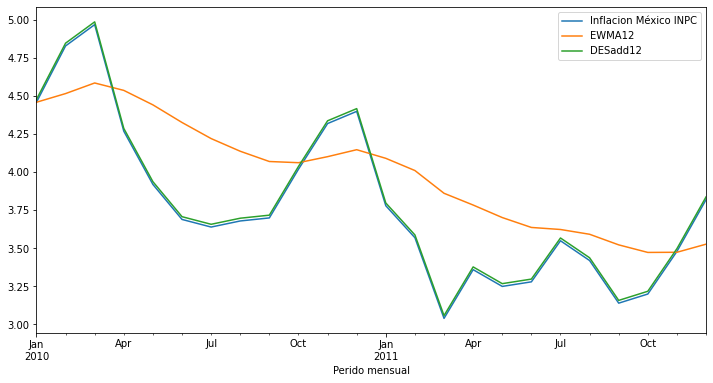

In [ ]:
imx[['Inflacion México INPC','EWMA12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

podemos ver que el suavizado exponencial doble es una representación mejor de los datos de la serie temporal.

Esto es así por que estamos modelando todos los componentes de la serie

Veamos si usar un ajuste estacional multiplicativo ayuda.

In [ ]:
imx['DESmul12'] = ExponentialSmoothing(imx['Inflacion México INPC'], trend='mul').fit().fittedvalues.shift(-1)
imx.head()

,Inflacion México INPC,desestacionalizado,PMS-6meses,PMS-12meses,EWMA12,SES12,DESadd12,DESmul12
Perido mensual,,,,,,,,
2010-01-01,4.46,4.481388,NaN,NaN,4.460000,4.460000,4.478125,4.441329
2010-02-01,4.83,4.843154,NaN,NaN,4.516923,4.516923,4.848125,4.812724
2010-03-01,4.97,5.045852,NaN,NaN,4.586627,4.586627,4.988125,4.953355
2010-04-01,4.27,4.329083,NaN,NaN,4.537915,4.537915,4.288125,4.251593
2010-05-01,3.92,3.902285,NaN,NaN,4.442851,4.442851,3.938125,3.900973


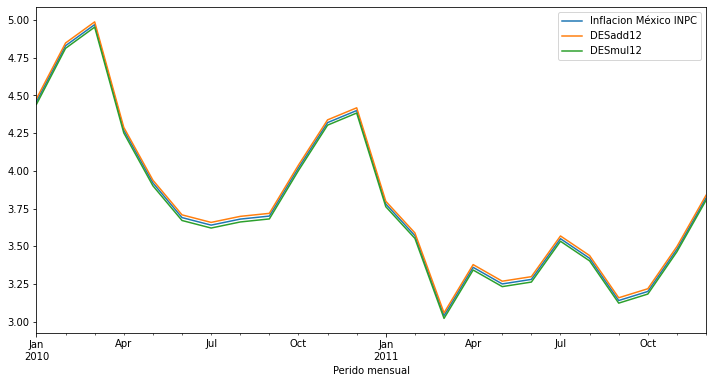

In [ ]:
imx[['Inflacion México INPC','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

## Triple Exponential Smoothing
El suavizado exponencial triple es el método más estrechamente asociado con Holt-Winters, agrega compatibilidad con las tendencias y la estacionalidad de los datos.

In [ ]:
imx['TESadd12'] = ExponentialSmoothing(imx['Inflacion México INPC'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
imx.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


,Inflacion México INPC,desestacionalizado,PMS-6meses,PMS-12meses,EWMA12,SES12,DESadd12,DESmul12,TESadd12
Perido mensual,,,,,,,,,
2010-01-01,4.46,4.481388,NaN,NaN,4.460000,4.460000,4.478125,4.441329,4.46
2010-02-01,4.83,4.843154,NaN,NaN,4.516923,4.516923,4.848125,4.812724,4.83
2010-03-01,4.97,5.045852,NaN,NaN,4.586627,4.586627,4.988125,4.953355,4.97
2010-04-01,4.27,4.329083,NaN,NaN,4.537915,4.537915,4.288125,4.251593,4.27
2010-05-01,3.92,3.902285,NaN,NaN,4.442851,4.442851,3.938125,3.900973,3.92


In [ ]:
imx['TESmul12'] = ExponentialSmoothing(imx['Inflacion México INPC'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
imx.head()

,Inflacion México INPC,desestacionalizado,PMS-6meses,PMS-12meses,EWMA12,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Perido mensual,,,,,,,,,,
2010-01-01,4.46,4.481388,NaN,NaN,4.460000,4.460000,4.478125,4.441329,4.46,4.189174
2010-02-01,4.83,4.843154,NaN,NaN,4.516923,4.516923,4.848125,4.812724,4.83,4.539477
2010-03-01,4.97,5.045852,NaN,NaN,4.586627,4.586627,4.988125,4.953355,4.97,4.691038
2010-04-01,4.27,4.329083,NaN,NaN,4.537915,4.537915,4.288125,4.251593,4.27,4.931712
2010-05-01,3.92,3.902285,NaN,NaN,4.442851,4.442851,3.938125,3.900973,3.92,3.995895


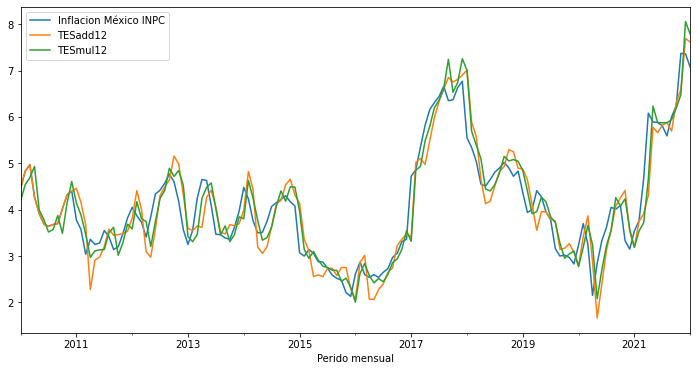

In [ ]:
imx[['Inflacion México INPC','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

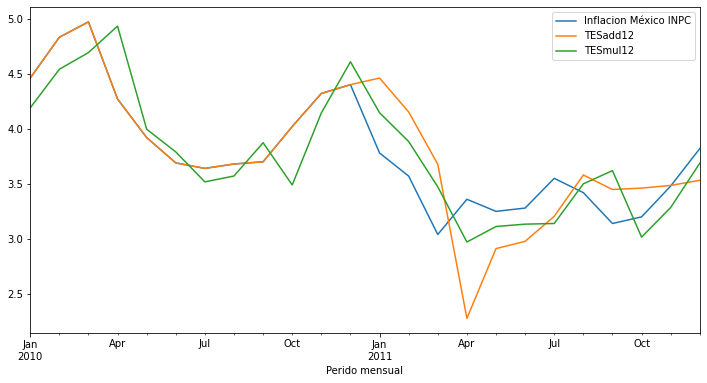

In [ ]:
imx[['Inflacion México INPC','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Según el gráfico anterior, podría pensarse que el suavizado exponencial triple hace un trabajo de ajuste peor que el suavizado exponencial doble. La clave aquí es considerar lo que viene a continuación: el pronóstico. Veremos que tener la capacidad de predecir patrones estacionales fluctuantes mejora enormemente nuestro pronóstico.

## pronóstico

In [ ]:
#volvemos a estimar los modelos, pero guardandolos en un objeto
modelo_DESadd12 = ExponentialSmoothing(imx['Inflacion México INPC'], trend='add').fit()
modelo_TESmul12 = ExponentialSmoothing(imx['Inflacion México INPC'],trend='mul',seasonal='mul',seasonal_periods=12).fit()


una vez guardados, hacemos el pronóstico


In [ ]:
pronostico_DESadd12 = modelo_DESadd12.forecast(36).rename('predicción DES')
pronostico_TESmul12 = modelo_TESmul12.forecast(36).rename('predicción TES')


ahora graficamos


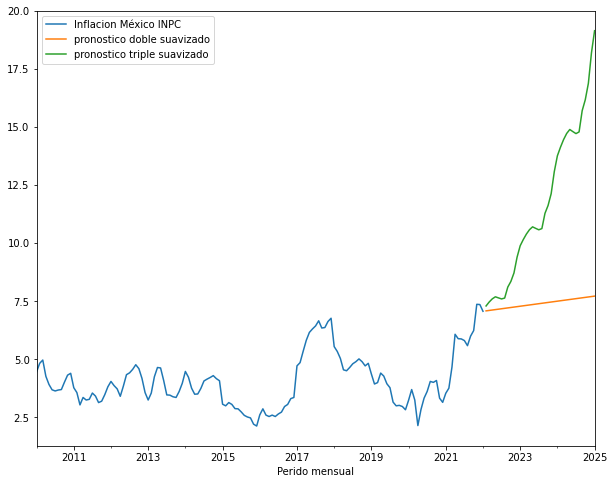

In [ ]:
imx['Inflacion México INPC'].plot(figsize=(10,8));
pronostico_DESadd12.plot(label ='pronostico doble suavizado');
pronostico_TESmul12.plot(label ='pronostico triple suavizado');
plt.legend(loc = 'upper left')


Obviamente como el modelo de doble suavizamiento exponencial (DES) solo contempla la tendencia, el pronóstico es la tendencia

el modelo de triple suavizado exponencial (TES) considera el factor estacional, pronóstica considerando el efecto estacional